# Sparsity study

In this notebook, we study the sparsity properties of the matrix A as a function of the number of particles, number of layers and angular tolerance

In [11]:
from trackhhl.toy.simple_generator import SimpleDetectorGeometry, SimpleGenerator
from trackhhl.hamiltonians.simple_hamiltonian import SimpleHamiltonian
from dataclasses import dataclass, field
import mplhep
import matplotlib.pyplot as plt
mplhep.style.use(mplhep.style.LHCb)
import numpy as np
import matplotlib as mpl

mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'

In [12]:
N_LAYERS = 10           
MIN_PARTICLES = 2       
MAX_PARTILCES = 30
STEP = 1     
DETECTOR = SimpleDetectorGeometry([i for i in range(N_LAYERS)], [float("+inf") for i in range(N_LAYERS)], [float("+inf") for i in range(N_LAYERS)], [i+1 for i in range(N_LAYERS)])

@dataclass
class RunParticles:
    min_particles: int  = MIN_PARTICLES
    max_particles: int  = MAX_PARTILCES
    step: int           = STEP  
    n_layers: int       = N_LAYERS
    n_particles: list    = field(default_factory=list)
    hits : list         = field(default_factory=list)
    matrix_size : list     = field(default_factory=list)
    non_zero_elements : list     = field(default_factory=list)
    sparsity : list     = field(default_factory=list)
    detector : list     = DETECTOR
    max_theta : list    = np.pi / 3
    epsilon : float     = 1e-5
    gamma : float       = 2.0
    delta : float       = 1.0
    
              
    def execute(self):
        generator = SimpleGenerator(self.detector, theta_max=self.max_theta)
    
        for n_particles in range(self.min_particles, self.max_particles):
            event = generator.generate_event(n_particles)
            self.hits.append(len(event.hits))
            self.n_particles.append(n_particles)
            hamiltonian = SimpleHamiltonian(self.epsilon, self.gamma, self.delta)
            hamiltonian.construct_hamiltonian(event)
            
            self.matrix_size.append(len(hamiltonian.segments))
            self.non_zero_elements.append(hamiltonian.A.count_nonzero())
            self.sparsity.append(self.non_zero_elements[-1]/(self.matrix_size[-1]**2))
            print(f"{n_particles}   {self.matrix_size[-1]}    {self.sparsity[-1]*100}%")

In [13]:
run_regul = RunParticles()
run_regul.execute()

run_nonregul = RunParticles(gamma=0, delta=0)
run_nonregul.execute()

2   36    5.246913580246913%
3   81    1.9661636945587562%
4   144    1.0030864197530864%
5   225    0.6024691358024691%
6   324    0.40009144947416553%
7   441    0.2843465428499442%
8   576    0.21219135802469136%
9   729    0.1642703517417738%
10   900    0.1308641975308642%
11   1089    0.10666815074528574%
12   1296    0.08859167809785093%
13   1521    0.07473715560500571%
14   1764    0.06388798905805708%
15   2025    0.0552842554488645%
16   2304    0.04826298466435185%
17   2601    0.04249688959721965%
18   2916    0.03768057037375739%
19   3249    0.033658579607940546%
20   3600    0.030262345679012342%
21   3969    0.027328195632554415%
22   4356    0.024811939412490377%
23   4761    0.022636310981001953%
24   5184    0.020726463667885994%
25   5625    0.01905461728395062%
26   6084    0.017560421899672392%
27   6561    0.016263724245105686%
28   7056    0.01507216643271065%
29   7569    0.0140251937863731%
2   36    2.4691358024691357%
3   81    0.7315957933241883%
4   144  

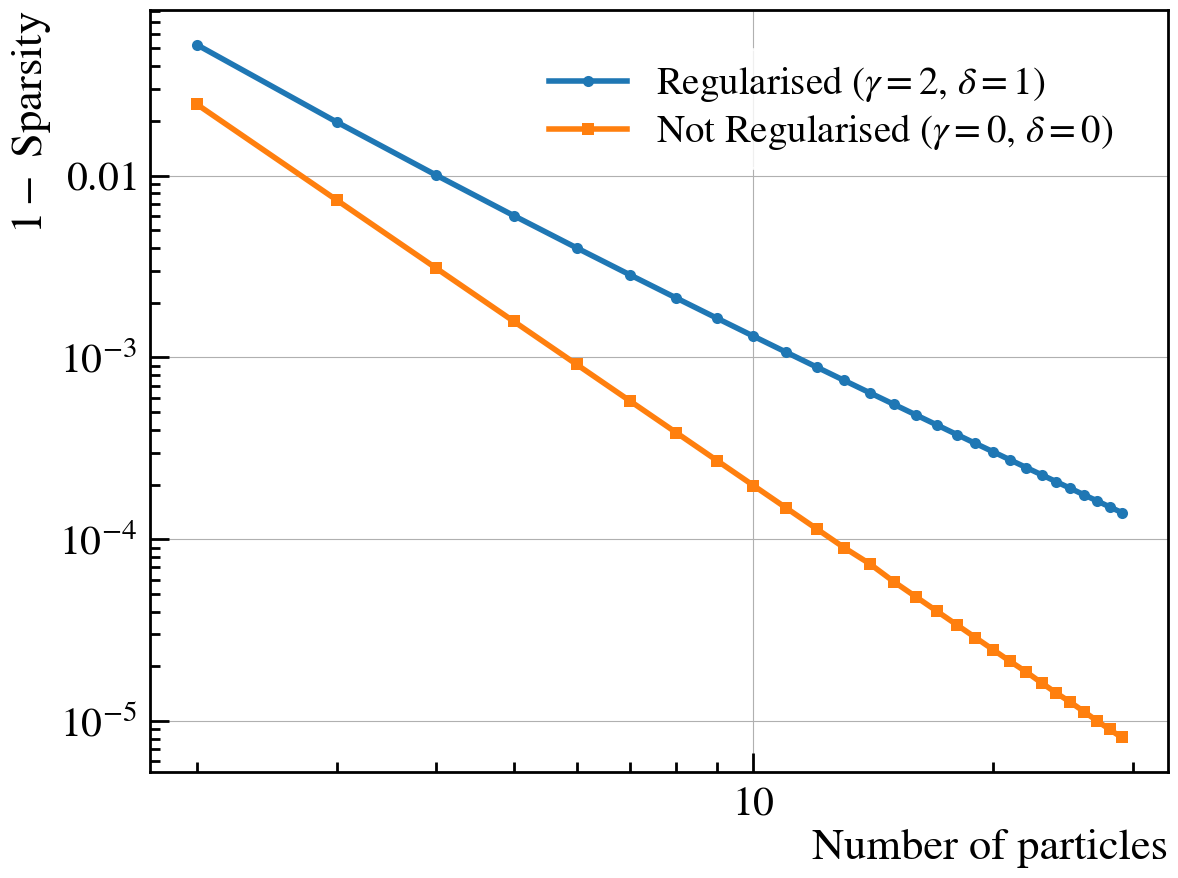

In [14]:
plt.plot(run_regul.n_particles, run_regul.sparsity, label="Regularised ($\gamma = 2$, $\delta=1$)")
plt.plot(run_nonregul.n_particles, run_nonregul.sparsity, label="Not Regularised ($\gamma = 0$, $\delta = 0$)")
plt.loglog()
plt.xlabel("Number of particles")
plt.ylabel("$1 -$ Sparsity")
plt.legend()
plt.grid()

In [15]:
MIN_LAYERS = 3            
MAX_LAYERS = 30
STEP = 1  
N_PARTICLES = 20
THRESHOLD = .45


@dataclass
class RunLayers:
    min_layers: int     = MIN_LAYERS
    max_layers: int     = MAX_LAYERS
    step : int          = STEP
    n_particles: int    = N_PARTICLES
    n_layers: int       = field(default_factory=list)
    hits : list         = field(default_factory=list)
    segments : list     = field(default_factory=list)
    matrix_size : list     = field(default_factory=list)
    non_zero_elements : list     = field(default_factory=list)
    sparsity : list     = field(default_factory=list)
    detector : list     = DETECTOR
    max_theta : list    = np.pi / 3
    epsilon : float     = 1e-5
    gamma : float       = 2.0
    delta : float       = 1.0
    
              
    def execute(self):
        for n_layers in range(self.min_layers, self.max_layers, self.step):
            detector = SimpleDetectorGeometry([i for i in range(n_layers)], [float("+inf") for i in range(n_layers)], [float("+inf") for i in range(n_layers)], [i+1 for i in range(n_layers)])
            generator = SimpleGenerator(detector, theta_max=self.max_theta)
            event = generator.generate_event(self.n_particles)
            self.hits.append(len(event.hits))
            self.n_layers.append(n_layers)
            hamiltonian = SimpleHamiltonian(self.epsilon, self.gamma, self.delta)
            hamiltonian.construct_hamiltonian(event)
            
            self.matrix_size.append(len(hamiltonian.segments))
            self.non_zero_elements.append(hamiltonian.A.count_nonzero())
            self.sparsity.append(self.non_zero_elements[-1]/(self.matrix_size[-1]**2))
            print(f"{n_layers}   {self.matrix_size[-1]}    {self.sparsity[-1]*100}%")
            

In [16]:
runlayer_regul = RunLayers()
runlayer_regul.execute()

runlayer_nonregul = RunLayers(gamma=0, delta=0)
runlayer_nonregul.execute()

3   800    0.13125%
4   1200    0.08888888888888889%
5   1600    0.0671875%
6   2000    0.054%
7   2400    0.04513888888888889%
8   2800    0.03877551020408163%
9   3200    0.033984375%
10   3600    0.030246913580246913%
11   4000    0.027262500000000002%
12   4400    0.024876033057851243%
13   4800    0.022743055555555555%
14   5200    0.021005917159763316%
15   5600    0.01951530612244898%
16   6000    0.01822777777777778%
17   6400    0.01708984375%
18   6800    0.016094290657439447%
19   7200    0.015208333333333334%
20   7600    0.014407894736842106%
21   8000    0.013690625000000001%
22   8400    0.013047052154195011%
23   8800    0.012476756198347106%
24   9200    0.011909262759924386%
25   9600    0.0114453125%
26   10000    0.010988%
27   10400    0.010552884615384615%
28   10800    0.010150891632373114%
29   11200    0.00978954081632653%
3   800    0.00625%
4   1200    0.005555555555555556%
5   1600    0.0046875%
6   2000    0.00405%
7   2400    0.003472222222222222%
8   2800

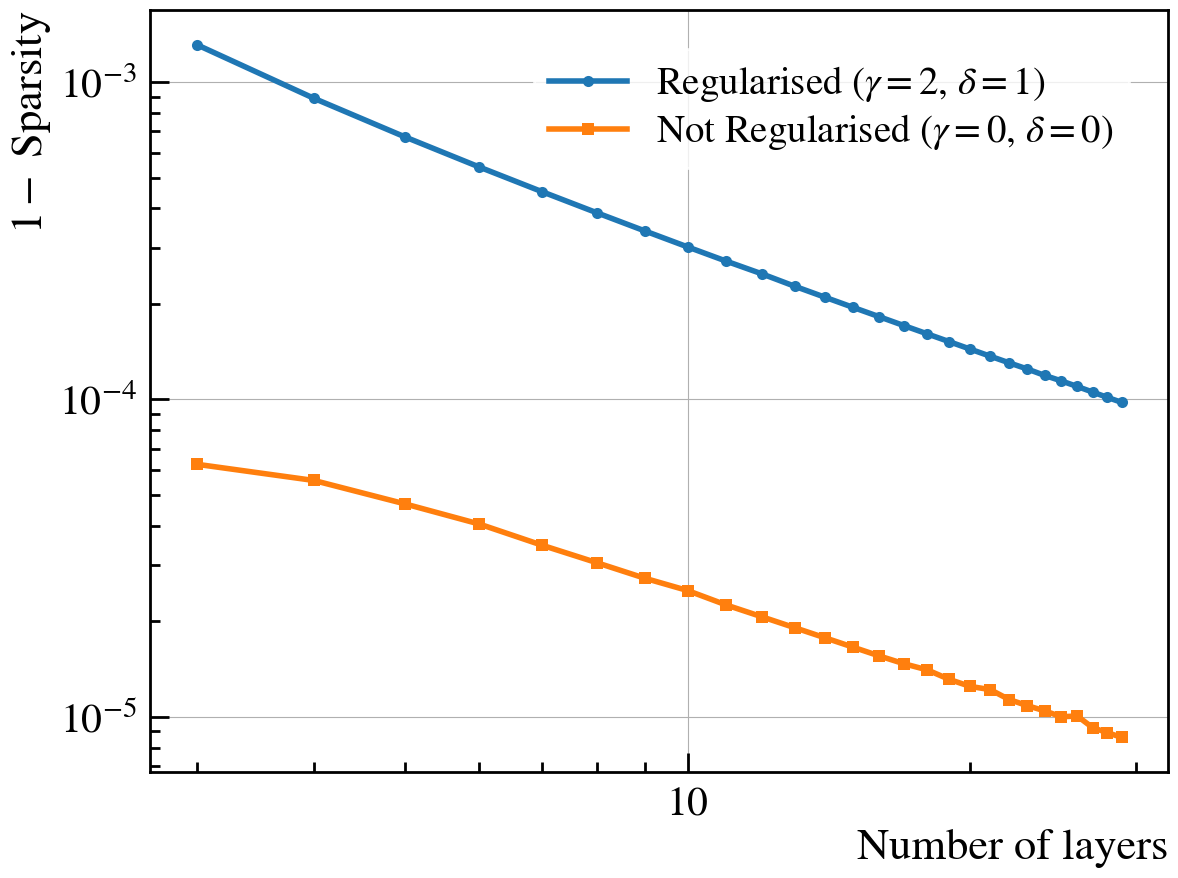

In [17]:
plt.plot(runlayer_regul.n_layers, runlayer_regul.sparsity, label="Regularised ($\gamma = 2$, $\delta=1$)")
plt.plot(runlayer_nonregul.n_layers, runlayer_nonregul.sparsity, label="Not Regularised ($\gamma = 0$, $\delta=0$)")
plt.loglog()
plt.xlabel("Number of layers")
plt.ylabel("$1 -$ Sparsity")
plt.legend()
plt.grid()

In [18]:
e5 = RunParticles(epsilon=1e-5, max_theta=np.pi/48/2)
e5.execute()

e4 = RunParticles(epsilon=1e-4, max_theta=np.pi/48/2)
e4.execute()

e3 = RunParticles(epsilon=1e-3, max_theta=np.pi/48/2)
e3.execute()

e2 = RunParticles(epsilon=1e-2, max_theta=np.pi/48/2)
e2.execute()

e1 = RunParticles(epsilon=1e-1, max_theta=np.pi/48/2)
e1.execute()

2   36    5.246913580246913%
3   81    1.9661636945587562%
4   144    1.0030864197530864%
5   225    0.6024691358024691%
6   324    0.4077122389879591%
7   441    0.2843465428499442%
8   576    0.220630787037037%
9   729    0.1642703517417738%
10   900    0.13160493827160494%
11   1089    0.10768002253101178%
12   1296    0.08859167809785093%
13   1521    0.07586102260658474%
14   1764    0.06401653631974331%
15   2025    0.056308489559518365%
16   2304    0.049091857156635804%
17   2601    0.042851646240813834%
18   2916    0.03857436667475788%
19   3249    0.035079572273629005%
20   3600    0.031003086419753086%
21   3969    0.02792490884729544%
22   4356    0.025085988021124512%
23   4761    0.023351002537993246%
24   5184    0.021106014708123764%
25   5625    0.019294814814814817%
26   6084    0.01780896940963699%
27   6561    0.016440276600858866%
28   7056    0.015389517484998535%
29   7569    0.014189271971303912%
2   36    5.555555555555555%
3   81    1.9661636945587562%
4   14

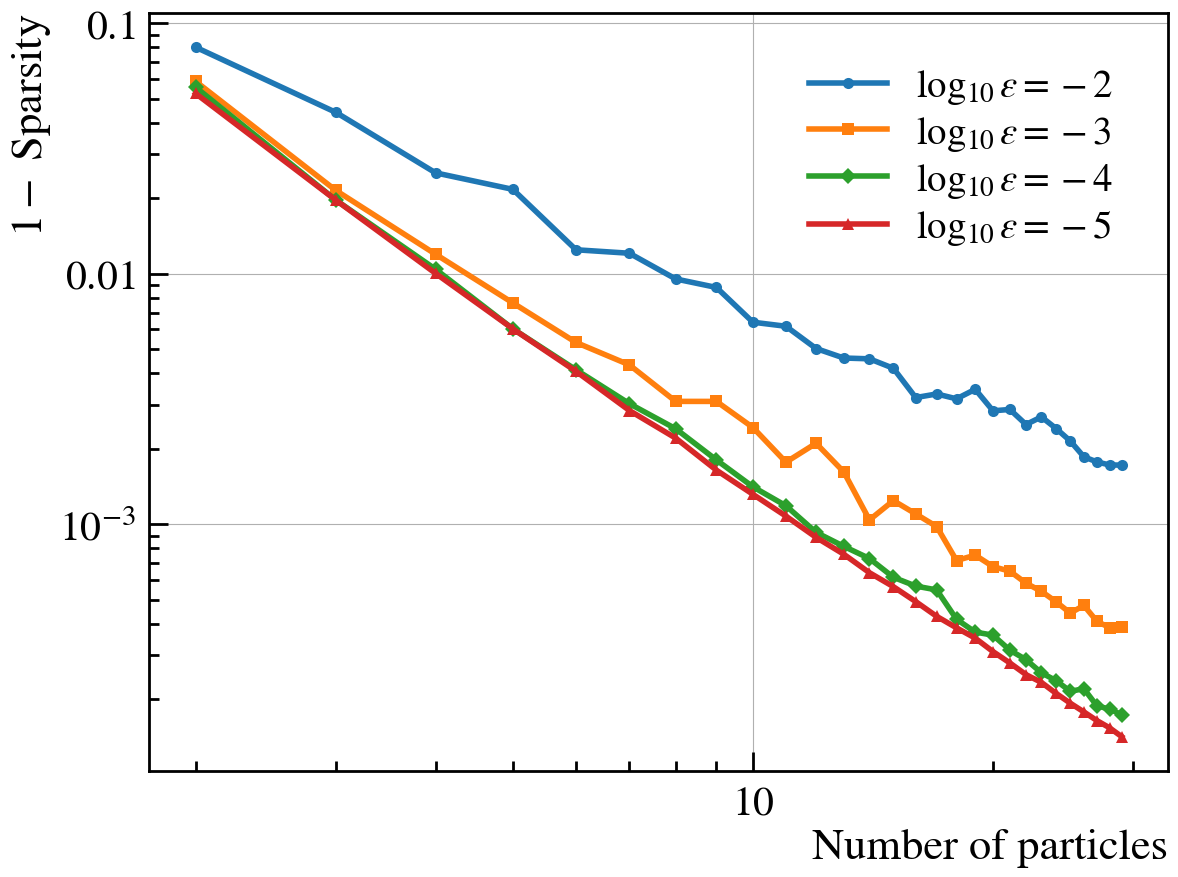

In [19]:
plt.plot(e2.n_particles, e2.sparsity, label="$\log_{10} \epsilon = -2$")
plt.plot(e3.n_particles, e3.sparsity, label="$\log_{10} \epsilon = -3$")
plt.plot(e4.n_particles, e4.sparsity, label="$\log_{10} \epsilon = -4$")
plt.plot(e5.n_particles, e5.sparsity, label="$\log_{10} \epsilon = -5$")

plt.loglog()
plt.xlabel("Number of particles")
plt.ylabel("$1 -$ Sparsity")
plt.legend()
plt.grid()

In [20]:
import pickle as pk

user_input = input("Do you want to SAVE? (yes/no): ")
if user_input.lower() in ["yes", "y"]:
    print("Saving...")
    with open("run_regul.pkl", "wb") as f:
        pk.dump(run_regul, f)
        
    with open("run_nonregul.pkl", "wb") as f:
        pk.dump(run_nonregul, f)
        
    with open("runlayer_regul.pkl", "wb") as f:
        pk.dump(runlayer_regul, f)
        
    with open("runlayer_nonregul.pkl", "wb") as f:
        pk.dump(runlayer_nonregul, f)
        
    with open("e1.pkl", "wb") as f:
        pk.dump(e1, f)
        
    with open("e2.pkl", "wb") as f:
        pk.dump(e2, f)
    
    with open("e3.pkl", "wb") as f:
        pk.dump(e3, f)
        
    with open("e4.pkl", "wb") as f:
        pk.dump(e4, f)
    
    with open("e5.pkl", "wb") as f:
        pk.dump(e5, f)
        
else:
    print("NOPing...")

    

NOPing...


# Conclusions

The sparsity increases asymptotically to 1 as a power-law, with respect to the problem size. It also has a dependence on the angular tolerance in events with high hit density.